In [2]:
%load_ext autoreload
%autoreload 2

import sys
import time

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
from scipy import spatial

import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

# %connect_info

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/deparis/Emma
/home/deparis/Emma


In [3]:
runset=db.Runset()
runset.load()
# runset.get_description()
# runset.get_folder()

In [99]:
run1=io.Run(runset.runs[10].folder)

In [100]:
run2=io.Run(runset.runs[1].folder)

In [103]:
run3=io.Run(runset.runs[4].folder)

In [188]:
# run4=io.Run(runset.runs[5].folder)
run4.step_list[0]

In [90]:
# cur_run=run1
# cur_step = run1.step_00017
# cur_cat=cur_step.fof

cur_run=run2
cur_step = run2.step_00015
cur_cat=cur_step.fof

# cur_run=run3
# cur_step = run3.step_00019
# cur_cat=cur_step.fof

In [124]:
ellips1=np.zeros(cur_step.fof.nfoftot)
ellips2=np.zeros(cur_step.fof.nfoftot)

for i in range(cur_step.fof.nfoftot):
    v=cur_step.fof.inertia_eig_val[i]
    arg = np.argsort(v)
    a=v[arg[2]]
    b=v[arg[1]]
    c=v[arg[0]]
    
    ellips1[i]= b/a
    ellips2[i]= c/a

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


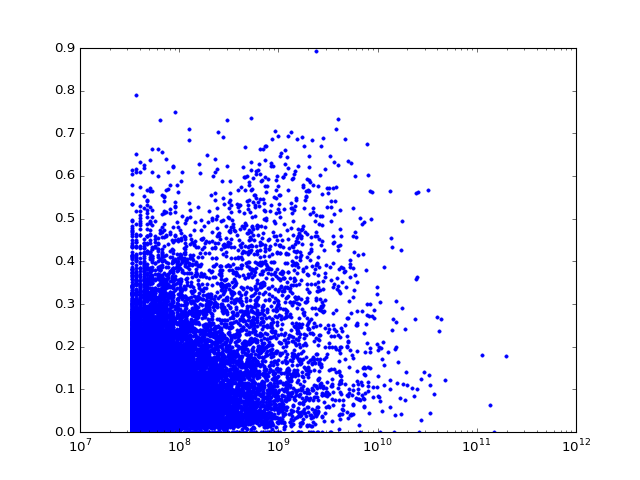

In [125]:
x=cur_step.fof.part_mass_fine
# x=ellips1
y=ellips2

# cm = plt.get_cmap('gist_rainbow')
# color = cm(cur_step.fof.part_mass/np.max(cur_step.fof.part_mass))

plt.figure()
plt.plot(x,y,'.')
plt.xscale('log')
# plt.yscale('log')


<IPython.core.display.Javascript object>


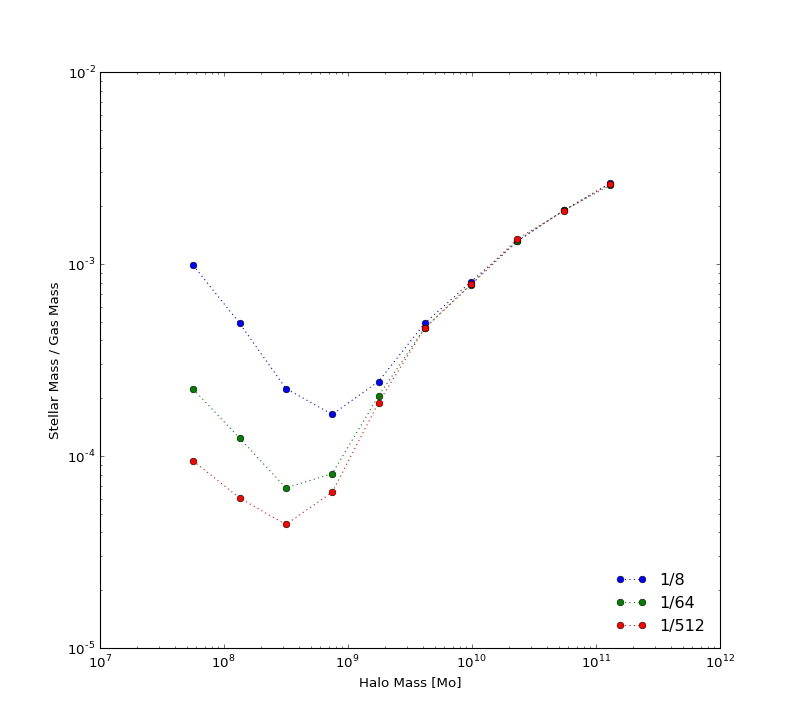

Reading /home/deparis/curie_data/data/8_8_gather_7/data/00015/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00015/halo/stars_fine
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/stars_fine
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00019/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00019/halo/stars_fine


In [127]:
labels=["1/8","1/64","1/512"]
plt.figure(figsize=(10,9))
for i,cur_step in enumerate ([run2.step_00015, run1.step_00017, run3.step_00019]):
    cur_step.fof.get_cells_fine(cur_step.grid)
    cur_step.fof.get_star_fine(cur_step.grid, cur_step.star)
    cur_step.fof.get_star_mass_fine(cur_step.star)

    got_stars = cur_step.fof.star_mass_fine!=0

    x= cur_step.fof.part_mass_fine[got_stars]            
    y=(cur_step.fof.star_mass_fine/cur_step.fof.part_mass_fine)[got_stars]
    

    if i==0:
        nbins=10
        bins=np.logspace(np.log10(np.nanmin(x)),np.log10(np.nanmax(x)),nbins+1)
        _x=(bins[1:]+bins[:-1])/2

    n1,_=np.histogram(x,bins=bins)
    h11,_=np.histogram(x,bins=bins,weights=y)
    h12,_=np.histogram(x,bins=bins,weights=y*y)
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)

    
#     plt.plot(x,y,'.k', zorder=100)
#     plt.errorbar(_x,h11/n1,yerr=err1,c='r', lw=3.0, zorder=101)

#     plt.errorbar(_x,h11/n1,yerr=err1,ls=':', zorder=101, label=labels[i])
    plt.plot(_x,h11/n1,':o', zorder=101, label=labels[i])
plt.legend(frameon=False,loc=4)    
# plt.ylim(1e-5,1e0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo Mass [Mo]")
plt.ylabel("Stellar Mass / Gas Mass")

<IPython.core.display.Javascript object>


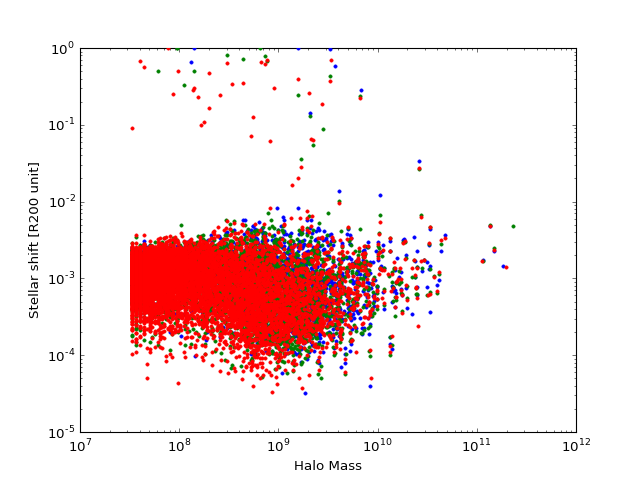

In [110]:
labels=["1/8","1/64","1/512"]
plt.figure()
for i,cur_step in enumerate ([run2.step_00015, run1.step_00017, run3.step_00019]):

    cur_step.fof.get_star_mass_fine(cur_step.star)

    got_stars = cur_step.fof.star_mass_fine!=0

    x= cur_step.fof.part_mass_fine[got_stars]

    A=np.power(cur_step.fof.x-cur_step.fof.mass_center_star_x,2)
    B=np.power(cur_step.fof.y-cur_step.fof.mass_center_star_y,2)
    C=np.power(cur_step.fof.z-cur_step.fof.mass_center_star_z,2)
    y= np.sqrt(A+B+C)[got_stars]#/cur_step.fof.R200[got_stars]

    nbins=8
    bins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)),nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    n1,_=np.histogram(x,bins=bins)
    h11,_=np.histogram(x,bins=bins,weights=y)
    h12,_=np.histogram(x,bins=bins,weights=y*y)
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)

#     plt.plot(x,y,'.k', zorder=100)
#     plt.errorbar(_x,h11/n1,yerr=err1,c='r', lw=3.0, zorder=101)
    
    plt.plot(x,y,'.', zorder=100)
#     plt.errorbar(_x,h11/n1,yerr=err1,c='r', lw=3.0, zorder=101)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo Mass")
plt.ylabel("Stellar shift [R200 unit]")

<IPython.core.display.Javascript object>


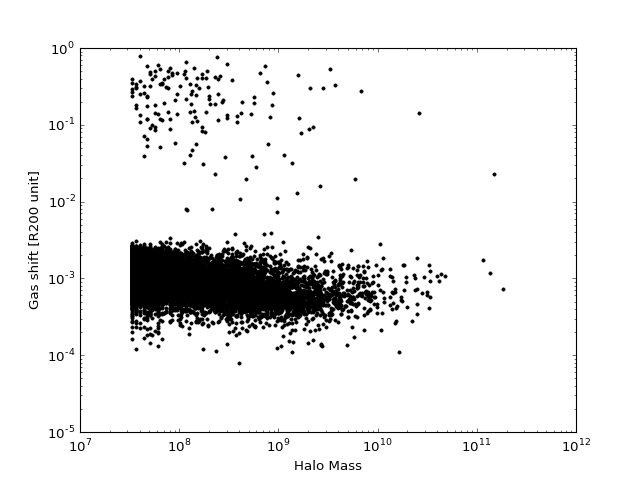

In [56]:
x= cur_step.fof.part_mass_fine

A=np.power(cur_step.fof.x-gas_x,2)
B=np.power(cur_step.fof.y-gas_y,2)
C=np.power(cur_step.fof.z-gas_z,2)
y= np.sqrt(A+B+C)#/cur_step.fof.R200

# mask=y<2
# x=x[mask]
# y=y[mask]

nbins=8
bins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)),nbins+1)
_x=(bins[1:]+bins[:-1])/2

n1,_=np.histogram(x,bins=bins)
h11,_=np.histogram(x,bins=bins,weights=y)
h12,_=np.histogram(x,bins=bins,weights=y*y)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1) 

plt.figure()
plt.plot(x,y,'.k', zorder=100)
# plt.errorbar(_x,h11/n1,yerr=err1,c='r', lw=3.0, zorder=101)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo Mass")
plt.ylabel("Gas shift [R200 unit]")

<IPython.core.display.Javascript object>


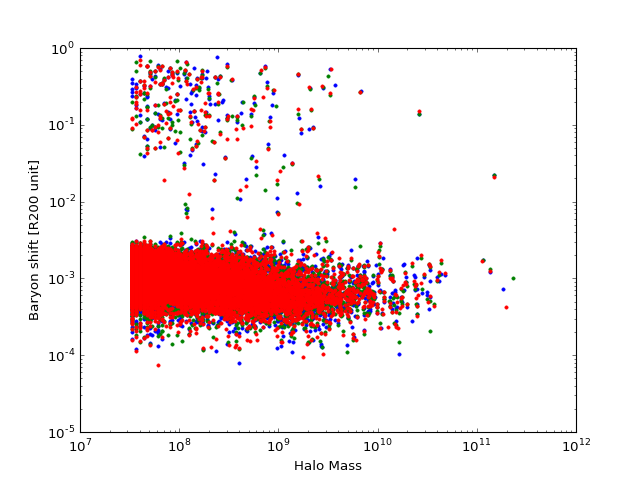

Reading /home/deparis/curie_data/data/8_8_gather_7/data/00015/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00015/halo/stars_fine
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/stars_fine
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00019/halo/cells_fine
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00019/halo/stars_fine


/home/deparis/.local/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [107]:
labels=["1/8","1/64","1/512"]
plt.figure()
for i,cur_step in enumerate ([run2.step_00015, run1.step_00017, run3.step_00019]):

    cur_step.fof.get_cells_fine(cur_step.grid)
    cur_step.fof.get_star_fine(cur_step.grid,cur_step.star)
    cur_step.fof.get_mass_center(cur_step)
    
    x= cur_step.fof.part_mass_fine

    A=np.power(cur_step.fof.x-cur_step.fof.mass_center_baryon_x,2)
    B=np.power(cur_step.fof.y-cur_step.fof.mass_center_baryon_y,2)
    C=np.power(cur_step.fof.z-cur_step.fof.mass_center_baryon_z,2)
    y= np.sqrt(A+B+C) #/cur_step.fof.R200

    # mask=y<2
    # x=x[mask]
    # y=y[mask]

    nbins=8
    bins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)),nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    n1,_=np.histogram(x,bins=bins)
    h11,_=np.histogram(x,bins=bins,weights=y)
    h12,_=np.histogram(x,bins=bins,weights=y*y)
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1) 

#     plt.plot(x,y,'.k', zorder=100)
#     plt.errorbar(_x,h11/n1,yerr=err1,c='r', lw=3.0, zorder=101)
    plt.plot(x,y,'.', zorder=100)
#     plt.errorbar(_x,h11/n1,yerr=err1, lw=3.0, zorder=101, label=labels[i])
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo Mass")
plt.ylabel("Baryon shift [R200 unit]")